In [3]:
import numpy as np
import gym
import random
import imageio
import os

import pickle5 as pickle
from tqdm.notebook import tqdm

## Creating the environment

In [4]:
env = gym.make("FrozenLake-v1", map_name="4x4", is_slippery=False)

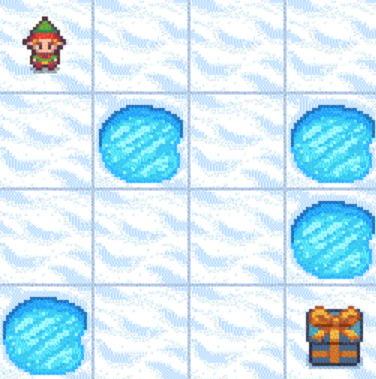

In [ ]:
state_space = env.observation_space.n
action_space = env.action_space.n

## Implementing the q_learning algorithm

In [8]:
def initialize_q_table(state_space, action_space):
  Qtable = np.zeros((state_space, action_space))
  return Qtable

In [9]:
Qtable_frozenlake = initialize_q_table(state_space, action_space)

In [10]:
def epsilon_greedy_policy(Qtable, state, epsilon):
  random_num = random.random()
  if random_num > epsilon:
    action = np.argmax(Qtable[state])
  else:
    action = env.action_space.sample()
  
  return action

In [11]:
def greedy_policy(Qtable, state):
  action = np.argmax(Qtable[state])
  return action

## Training the agent

In [12]:
n_training_episodes = 10000  
learning_rate = 0.7          

n_eval_episodes = 100        

env_id = "FrozenLake-v1"     
max_steps = 99               
gamma = 0.95                 
eval_seed = []               

max_epsilon = 1.0             
min_epsilon = 0.05            
decay_rate = 0.0005           

In [13]:
def train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable):
  for episode in tqdm(range(n_training_episodes)):
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    state = env.reset()
    step = 0
    done = False

    for step in range(max_steps):
      action = epsilon_greedy_policy(Qtable, state, epsilon)
      new_state, reward, done, info = env.step(action)
      Qtable[state][action] = Qtable[state][action] + learning_rate*(reward + gamma * Qtable[new_state][greedy_policy(Qtable, new_state)] - Qtable[state][action])

      if done:
        break
      state = new_state
  return Qtable

In [14]:
Qtable_frozenlake = train(n_training_episodes, min_epsilon, max_epsilon, decay_rate, env, max_steps, Qtable_frozenlake)

  0%|          | 0/10000 [00:00<?, ?it/s]

## Visualizing the Q_table

In [15]:
Qtable_frozenlake

array([[0.73509189, 0.77378094, 0.77378094, 0.73509189],
       [0.73509189, 0.        , 0.81450625, 0.77378094],
       [0.77378094, 0.857375  , 0.77378094, 0.81450625],
       [0.81450625, 0.        , 0.77378094, 0.77378094],
       [0.77378094, 0.81450625, 0.        , 0.73509189],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.        , 0.81450625],
       [0.        , 0.        , 0.        , 0.        ],
       [0.81450625, 0.        , 0.857375  , 0.77378094],
       [0.81450625, 0.9025    , 0.9025    , 0.        ],
       [0.857375  , 0.95      , 0.        , 0.857375  ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.9025    , 0.95      , 0.857375  ],
       [0.9025    , 0.95      , 1.        , 0.9025    ],
       [0.        , 0.        , 0.        , 0.        ]])

## Evaluating the agent

In [16]:
def evaluate_agent(env, max_steps, n_eval_episodes, Q, seed):
  episode_rewards = []
  for episode in tqdm(range(n_eval_episodes)):
    if seed:
      state = env.reset(seed=seed[episode])
    else:
      state = env.reset()
    step = 0
    done = False
    total_rewards_ep = 0
    
    for step in range(max_steps):
      action = np.argmax(Q[state][:])
      new_state, reward, done, info = env.step(action)
      total_rewards_ep += reward
        
      if done:
        break
      state = new_state
    episode_rewards.append(total_rewards_ep)
  mean_reward = np.mean(episode_rewards)
  std_reward = np.std(episode_rewards)

  return mean_reward, std_reward

In [17]:
mean_reward, std_reward = evaluate_agent(env, max_steps, n_eval_episodes, Qtable_frozenlake, eval_seed)
print(f"Mean_reward={mean_reward:.2f} +/- {std_reward:.2f}")

  0%|          | 0/100 [00:00<?, ?it/s]

Mean_reward=1.00 +/- 0.00
